In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data (erp):

In [47]:
erp = pd.read_csv('p5_erp.csv', sep=';', decimal=',')

In [48]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [49]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


## Cleaning Data (erp):

In [50]:
erp.duplicated(subset=['product_id']).sum()

0

In [51]:
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [52]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


## Import Data (web):

In [53]:
web = pd.read_csv('p5_web.csv', sep=';')

In [54]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [55]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

### Cleaning Data (web):

In [56]:
web = web.rename(columns={'sku':'id_web'})

In [57]:
web.id_web.unique()

array(['bon-cadeau-25-euros', '15298', '15296', '15300', '19814', '19815',
       '15303', '14975', '16042', '14980', '16041', '15269', '14977',
       '16044', '16043', '16449', '16045', '16030', '13127', '19816',
       '16029', '16039', '16318', '16275', '16498', '16320', '16319',
       '15966', '15022', '15967', '15490', '16416', '11862', '15444',
       '15953', '12045', '13074', '15941', '16069', '13072', '15440',
       '13435', '13078', '13117', '16296', '16014', '16462', '16013',
       '16180', '15676', '16120', '15564', '15675', '15378', '15813',
       '13416', '14905', '15767', '16505', '15683', '16504', '15787',
       '14800', '15353', '15382', '15339', '11668', '13209', '15341',
       '13217', '304', '11641', '1662', '1360', '15648', '1364', '7086',
       '1366', '15140', '16238', '16237', '15141', '14944', '14941',
       '14751', '16093', '15668', '15373', '15375', '14474', '15482',
       '13453', '15075', '16124', '15785', '15784', '15786', '14332',
       '16210

In [58]:
web['id_web'] = web['id_web'].replace(['13127-1'], '13127')

In [59]:
web.duplicated(subset=['id_web', 'post_type']).sum()

85

In [60]:
web.drop_duplicates(subset=['id_web', 'post_type'])

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,15741,0,0,0,0.0,2.0,NaN,NaN,2.0,2020-04-25 12:49:49,...,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [61]:
web.isna().sum()

id_web                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [62]:
web = web.fillna(0)

In [63]:
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


## Import Data (liaison):

In [64]:
liaison = pd.read_csv('p5_liaison.csv', sep=';')

In [65]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [66]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


## Cleaning Data (liaison):

In [67]:
liaison.id_web.unique()

array(['15298', '15296', '15300', '19814', '19815', '15303', '14975',
       '16042', '14980', '16041', '15269', '14977', '16044', '16043',
       '16449', '16045', '16030', '13127', '19816', nan, '16029', '16039',
       '16318', '16275', '16498', '16320', '16319', '15966', '15022',
       '15967', '15490', '16416', '11862', '15444', '15953', '12045',
       '13074', '15941', '16069', '13072', '15440', '13435', '13078',
       '13117', '16296', '16014', '16462', '16013', '16180', '15676',
       '16120', '15564', '15675', '15378', '15813', '13416', '14905',
       '15767', '16505', '15683', '16504', '15787', '14800', '15353',
       '15382', '15339', '11668', '13209', '15341', '13217', '304',
       '11641', '1662', '1360', '15648', '1364', '7086', '1366', '15140',
       '16238', '16237', '15141', '14944', '14941', '14751', '16093',
       '15668', '15373', '15375', '14474', '15482', '13453', '15075',
       '16124', '15785', '15784', '15786', '14332', '16210', '16211',
       '16209

In [68]:
liaison['id_web'] = liaison.id_web.replace(['13127-1'], '13127')
liaison['id_web'] = liaison.id_web.replace(['14680-1'], '14680')

In [69]:
liaison.duplicated(subset=['product_id','id_web']).sum()

0

In [70]:
liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [71]:
liaison = liaison.fillna(0)

In [72]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


## Data (laurent):

### 1) Jointure des exports:

In [73]:
#première jointure entre erp et liaison:
erp2 = erp.merge(liaison, how='right', on='product_id')
#deuxième jointure entre erp2 et web:
erp3 = erp2.merge(web, how='right', on='id_web')
erp3.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [74]:
erp3.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,0,0,0,0.0,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,4954,1,25.0,0,instock,bon-cadeau-25-euros,0,0,0,0.0,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [75]:
erp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 9168
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             9169 non-null   int64  
 1   onsale_web             9169 non-null   int64  
 2   price                  9169 non-null   float64
 3   stock_quantity         9169 non-null   int64  
 4   stock_status           9169 non-null   object 
 5   id_web                 9169 non-null   object 
 6   virtual                9169 non-null   int64  
 7   downloadable           9169 non-null   int64  
 8   rating_count           9169 non-null   int64  
 9   average_rating         9169 non-null   float64
 10  total_sales            9169 non-null   float64
 11  tax_status             9169 non-null   object 
 12  tax_class              9169 non-null   float64
 13  post_author            9169 non-null   float64
 14  post_date              9169 non-null   object 
 15  post

### 2) Calcul du chiffre d'affaire par produit:

In [76]:
#calcul:
chiffre = erp3[['post_name', 'total_sales', 'price']]
chiffre2 = chiffre.drop_duplicates()
chiffre3 = chiffre2[chiffre2['total_sales'] > 0].groupby(['post_name', 'total_sales']).price.sum().reset_index()
valeur = chiffre3['total_sales'] * chiffre3['price']
chiffre3['chiffre_produit'] = valeur
chiffre3.head()

,post_name,total_sales,price,chiffre_produit
0,agnes-levet-amethyste-2017,4.0,41.2,164.8
1,agnes-levet-cote-rotie-maestria-2017,3.0,55.0,165.0
2,agnes-levet-cote-rotie-peroline-2017,3.0,57.0,171.0
3,alain-graillot-crozes-hermitage-blanc-2018,10.0,24.4,244.0
4,alain-graillot-crozes-hermitage-rouge-2017,6.0,24.4,146.4


### 3) Calcul du chiffre d'affaire réalisé en ligne:

In [77]:
#calcul:
chiffre3.chiffre_produit.sum()

71829.0

### 4) Analyse sur la variable prix:

#### 4.1) description de la variable prix:

In [78]:
erp3.price.describe()

count    9169.000000
mean       33.786225
std        21.324810
min         5.200000
25%        20.500000
50%        30.500000
75%        44.000000
max       225.000000
Name: price, dtype: float64

#### 4.2) Analyse de la dispersion:

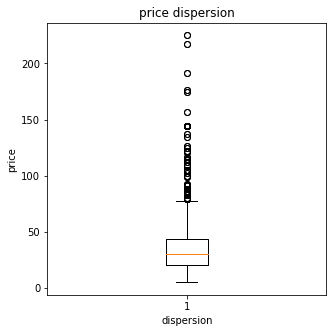

In [79]:
plt.figure(figsize=(5,5))
plt.boxplot(erp3.price)
plt.title('price dispersion')
plt.xlabel('dispersion')
plt.ylabel('price')
plt.show()

#### 4.3) calcul moyenne et écart-type:

In [80]:
#calcul moyenne:
price_mean = np.mean(erp3.price)
print('moyenne:', "{:.3}".format(price_mean))

moyenne: 33.8


In [81]:
# calcul ecart-type:
price_std = np.std(erp3.price)
print('écart-type:', '{:.3}'.format(price_std))

écart-type: 21.3


In [82]:
# calcul ecart_type * 3:
price_std3= 3*price_std
print('3 écarts-types:', '{:.3}'.format(price_std3))

3 écarts-types: 64.0


#### 4.4) déterminer les valeurs de dispersion max/min:

In [83]:
#calcul dispersion max:
price_dispersion_max = price_mean + price_std3
print('prix max:', '{:.3}'.format(price_dispersion_max))

prix max: 97.8


In [84]:
#calcul dispersion min:
price_dispersion_min = price_mean - price_std3
print('prix min:', '{:.3}'.format(price_dispersion_min))

prix min: -30.2


#### 4.5) Visualisation à l'aide de graphiques:

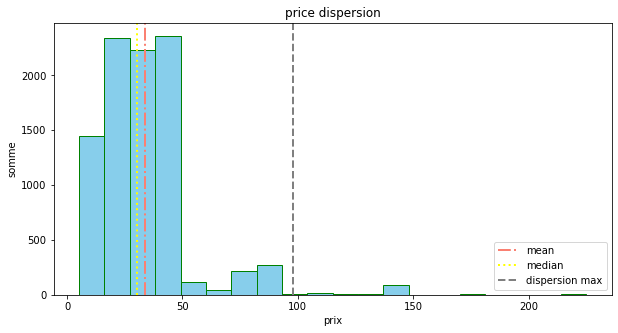

In [85]:
plt.figure(figsize=(10,5))
plt.hist(erp3.price, bins=20,color='skyblue', edgecolor='green')
plt.title('price dispersion')
plt.xlabel('prix')
plt.ylabel('somme')
plt.axvline(erp3.price.mean(), color='salmon',linestyle='dashdot', linewidth=2, label='mean')
plt.axvline(erp3.price.median(), color='yellow',linestyle='dotted', linewidth=2, label='median')
plt.axvline(price_dispersion_max, color='grey',linestyle='dashed', linewidth=2, label='dispersion max')
plt.legend(loc='lower right');
plt.show()

#### 4.6) Conclusion:

##### Sachant que le prix d'une bouteille de vin ne peux être <=0, Toutes valeurs se trouvant ] 0 ; 97.7 ] sont considérées comme possible. En revanche toutes valeurs >97.7 sera considérées comme aberrantes.

#### 4.7) Vérification des valeurs aberrantes:

In [86]:
#Vérification des références:
chiffre4 = chiffre[chiffre['price'] > 97.7].groupby('post_name').sum().reset_index()
chiffre4

,post_name,total_sales,price
0,0,0.0,11952.0
1,camille-giroud-clos-de-vougeot-2016,0.0,350.0
2,champagne-agrapart-fils-lavizoise-grand-cru-20...,0.0,224.0
3,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,22.0,253.0
4,champagne-egly-ouriet-grand-cru-millesime-2008,10.0,450.0
5,champagne-gosset-celebris-vintage-2007,4.0,270.0
6,chateau-de-puligny-montrachet-1cru-champ-canet...,0.0,219.2
7,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,314.0
8,cognac-frapin-cigar-blend,2.0,208.0
9,cognac-frapin-fontpinot-xo,4.0,217.0


In [87]:
#Vérification des référence en fonction de la vente:
chiffre5 = chiffre4[chiffre4['total_sales'] > 0]
chiffre5

,post_name,total_sales,price
3,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,22.0,253.0
4,champagne-egly-ouriet-grand-cru-millesime-2008,10.0,450.0
5,champagne-gosset-celebris-vintage-2007,4.0,270.0
8,cognac-frapin-cigar-blend,2.0,208.0
9,cognac-frapin-fontpinot-xo,4.0,217.0
10,cognac-frapin-vip-xo,26.0,352.0
11,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,6.0,382.6
20,domaine-des-comtes-lafon-volnay-1er-cru-santen...,4.0,230.0
22,domaine-des-croix-corton-charlemagne-grand-cru...,10.0,274.0


In [88]:
chiffre5.duplicated(subset=(['post_name'])).sum()

0

In [89]:
chiffre5.post_name.unique()

array(['champagne-egly-ouriet-grand-cru-brut-blanc-de-noirs',
       'champagne-egly-ouriet-grand-cru-millesime-2008',
       'champagne-gosset-celebris-vintage-2007',
       'cognac-frapin-cigar-blend', 'cognac-frapin-fontpinot-xo',
       'cognac-frapin-vip-xo',
       'coteaux-champenois-egly-ouriet-ambonnay-rouge-2016',
       'domaine-des-comtes-lafon-volnay-1er-cru-santenots-du-milieu-2015',
       'domaine-des-croix-corton-charlemagne-grand-cru-2016'],
      dtype=object)

#### Conclusion:
Après étude des différentes références, certaines doivent faire l'objet d'une nouvelle estimation. En exemple on peut citer: champagne-egly-ouriet-grand-cru-brut-blanc-de-noirs(126.0), champagne-egly-ouriet-grand-cru-millesime-2008(225.0), champagne-gosset-celebris-vintage-2007(129.0) ...  
Sinon, mis à part la nécéssité de suprimer la ligne en index 0 et de réévaluer certaines références, les autres ne doivent plus être considérés comme aberrantes. Car, il est tout à fait probant qu'il y ai une grosse différence de prix entre certaines catégories de vins.  